In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
import glob
import warnings

warnings.filterwarnings('ignore')

sns.set(rc={"figure.dpi":1200})
sns.set_context('notebook')
sns.set_style("ticks")

mpl.style.use('default')

# Update rcParams for global consistency
mpl.rcParams.update({
    'axes.linewidth': 7,           # Line width for axes
    'xtick.major.size': 20,        # Major tick size
    'xtick.major.width': 7,        # Major tick width
    'xtick.minor.size': 10,        # Minor tick size
    'xtick.minor.width': 7,        # Minor tick width
    'ytick.major.size': 20,        # Major tick size
    'ytick.major.width': 7,        # Major tick width
    'ytick.minor.size': 10,        # Minor tick size
    'ytick.minor.width': 7,        # Minor tick width
    'ytick.labelsize': 48,         # Label size for y ticks
    'xtick.labelsize': 48,         # Label size for x ticks
    'font.size': 60,               # Font size for text
    'font.sans-serif': 'Arial',
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Arial',
    'mathtext.it': 'Arial',
    'mathtext.bf': 'Arial:bold',
    'lines.linewidth': 7,          # Line width for all lines
    'scatter.marker': 'o',         # Default marker for scatter
    'lines.markersize': 10,        # Marker size for scatter in points
    'axes.titlesize': 'large',     # Title size
    'axes.labelsize': 'large',     # Label size for axes
    'legend.fontsize': 'large'     # Font size for legends
})


In [22]:
import os
import pandas as pd

# Define a function to rename DataFrames based on their filenames
def rename_dataframes():
    files = os.listdir()  # List all files in the current directory
    loaded_dfs = []  # Store names of loaded DataFrames for printing

    for file in files:
        if file.endswith(".csv"):  # Process only .csv files
            # Read the file into a DataFrame
            df = pd.read_csv(file)
            
            # Determine the new name based on the filename
            if file.startswith("Hif1AD2"):
                # Keep everything before the second underscore
                new_name = "_".join(file.split("_")[:3])
            else:
                # Keep everything before the first underscore
                new_name = file.split("_")[0]
            
            # Assign the DataFrame to a variable with the new name
            globals()[new_name] = df
            loaded_dfs.append(new_name)  # Add new DataFrame name to the list
            print(f"Loaded and renamed: {file} → {new_name}")
    
    # Print all the new DataFrame names
    print("\nNewly created DataFrames:")
    for df_name in loaded_dfs:
        print(f"{df_name}")

# Call the function to load and rename DataFrames
rename_dataframes()


Loaded and renamed: Hif1AD2_46_RKD_312ec_unrelaxed_rank_001_alphafold2_ptm_model_3_seed_000_dssp.csv → Hif1AD2_46_RKD
Loaded and renamed: CITED2EDAmut0to20_094e4_unrelaxed_rank_001_alphafold2_ptm_model_3_seed_000_dssp.csv → CITED2EDAmut0to20
Loaded and renamed: Hif1AD2_46_NQW_8365c_unrelaxed_rank_001_alphafold2_ptm_model_4_seed_000_dssp.csv → Hif1AD2_46_NQW
Loaded and renamed: CITED2RKAmut20to39_0cab3_unrelaxed_rank_001_alphafold2_ptm_model_3_seed_000_dssp.csv → CITED2RKAmut20to39
Loaded and renamed: Hif1AD2_46_MAW_c2e1c_unrelaxed_rank_001_alphafold2_ptm_model_3_seed_000_dssp.csv → Hif1AD2_46_MAW
Loaded and renamed: CITED2LW_5b72e_unrelaxed_rank_001_alphafold2_ptm_model_4_seed_000_dssp.csv → CITED2LW
Loaded and renamed: CITED2WT_28a97_unrelaxed_rank_001_alphafold2_ptm_model_3_seed_000_dssp.csv → CITED2WT
Loaded and renamed: GS39_b78cc_unrelaxed_rank_001_alphafold2_ptm_model_3_seed_000_dssp.csv → GS39
Loaded and renamed: CITED2LF_af5c8_unrelaxed_rank_001_alphafold2_ptm_model_4_seed_000_

In [49]:
import pandas as pd

# List of DataFrame names
df_names = [
    "Hif1AD2_46_RKD", "CITED2EDAmut0to20", "Hif1AD2_46_NQW",
    "CITED2RKAmut20to39", "Hif1AD2_46_MAW", "CITED2LW",
    "CITED2WT", "GS39", "CITED2LF", "CITED2killmotif1",
    "Hif1AD2_46_RKE", "CITED2RKE", "Hif1AD2_46_WT", "GS46"
]

# Initialize a list to store the results
results = []

# Process each DataFrame
for name in df_names:
    if name in globals():  # Check if the DataFrame exists
        df = globals()[name]  # Access the DataFrame
        # Count the total number of 'H' in the 'Secondary Structure' column
        total_H = df['Secondary Structure'].str.count('H').sum()
        # Get the max value from the 'Residue Number' column
        max_residue_number = df['Residue Number'].max()
        # Calculate the percentage of helices
        percent_helix = (total_H / max_residue_number) * 100
        # Append the result
        results.append({"Name": name, "Percent Helix": percent_helix})
    else:
        print(f"DataFrame '{name}' does not exist.")

# Convert the results to a new DataFrame
summary_df = pd.DataFrame(results)

# Display the summary DataFrame
print(summary_df)


                  Name  Percent Helix
0       Hif1AD2_46_RKD      36.956522
1    CITED2EDAmut0to20      46.153846
2       Hif1AD2_46_NQW      36.956522
3   CITED2RKAmut20to39      46.153846
4       Hif1AD2_46_MAW      34.782609
5             CITED2LW      76.923077
6             CITED2WT      35.897436
7                 GS39       0.000000
8             CITED2LF      35.897436
9     CITED2killmotif1      51.282051
10      Hif1AD2_46_RKE      41.304348
11           CITED2RKE      35.897436
12       Hif1AD2_46_WT      34.782609
13                GS46       0.000000


In [52]:
import pandas as pd

# List of DataFrame names
df_names = [
    "Hif1AD2_46_RKD", "CITED2EDAmut0to20", "Hif1AD2_46_NQW",
    "CITED2RKAmut20to39", "Hif1AD2_46_MAW", "CITED2LW",
    "CITED2WT", "GS39", "CITED2LF", "CITED2killmotif1",
    "Hif1AD2_46_RKE", "CITED2RKE", "Hif1AD2_46_WT", "GS46"
]

# Initialize a list to store the results
results = []

# Process each DataFrame
for name in df_names:
    if name in globals():  # Check if the DataFrame exists
        df = globals()[name]  # Access the DataFrame
        # Count the total number of 'H' in the 'Secondary Structure' column
        total_H = df['Secondary Structure'].str.count('H').sum()
        # Get the max value from the 'Residue Number' column
        max_residue_number = df['Residue Number'].max()
        # Calculate the percentage of helices
        percent_helix = (total_H / max_residue_number) * 100
        # Append the result
        results.append({
            "Name": name,
            "Total H": total_H,
            "Max Residue Number": max_residue_number,
            "Percent Helix": percent_helix
        })
    else:
        print(f"DataFrame '{name}' does not exist.")

# Convert the results to a new DataFrame
summary_df = pd.DataFrame(results)

# Display the summary DataFrame
print(summary_df)
# Process the summary_df DataFrame
def process_summary_df(summary_df):
    # Create new columns for 'mut name' and 'protein'
    summary_df['mut name'] = np.nan
    summary_df['protein'] = np.nan

    # Process rows based on the 'Name' column
    for index, row in summary_df.iterrows():
        if row['Name'].startswith("Hif1AD2_46_"):
            # Extract everything after the second underscore
            summary_df.at[index, 'mut name'] = "_".join(row['Name'].split("_")[2:])
            summary_df.at[index, 'protein'] = "HIF1A"
        elif row['Name'].startswith("CITED2"):
            # Extract everything after "CITED2"
            summary_df.at[index, 'mut name'] = row['Name'][6:]  # Skip "CITED2"
            summary_df.at[index, 'protein'] = "CITED2"
        else:
            # Fill columns with N/A
            summary_df.at[index, 'mut name'] = np.nan
            summary_df.at[index, 'protein'] = np.nan

    return summary_df

# Apply the function to your summary_df
summary_df = process_summary_df(summary_df)
summary_df.rename(columns={'mut name': 'old mut name'}, inplace=True)

# Display the updated DataFrame
summary_df
# Define the mapping for replacements
replacement_map = {
    "NQW": "NQ>W",
    "MAW": "MA>W",
    "RKE": "RK>E",
    "RKD": "RK>D",
    "killmotif1": "FL>A_NT",
    "LF": "L>F",
    "LW": "L>W",
    "RKAmut20to39": "RK>A_CT"
}

# Ensure 'old mut name' exists and is a column
if 'old mut name' in summary_df.columns:
    # Create a new column 'mut name' using the replacement map
    summary_df['mut name'] = summary_df['old mut name'].apply(
        lambda x: replacement_map.get(x, x) if isinstance(x, str) else x
    )

    # Display the updated DataFrame
    print(summary_df.head())
else:
    print("Column 'old mut name' does not exist in the DataFrame.")

summary_df

                  Name  Total H  Max Residue Number  Percent Helix
0       Hif1AD2_46_RKD     17.0                  46      36.956522
1    CITED2EDAmut0to20     18.0                  39      46.153846
2       Hif1AD2_46_NQW     17.0                  46      36.956522
3   CITED2RKAmut20to39     18.0                  39      46.153846
4       Hif1AD2_46_MAW     16.0                  46      34.782609
5             CITED2LW     30.0                  39      76.923077
6             CITED2WT     14.0                  39      35.897436
7                 GS39      0.0                  39       0.000000
8             CITED2LF     14.0                  39      35.897436
9     CITED2killmotif1     20.0                  39      51.282051
10      Hif1AD2_46_RKE     19.0                  46      41.304348
11           CITED2RKE     14.0                  39      35.897436
12       Hif1AD2_46_WT     16.0                  46      34.782609
13                GS46      0.0                  46       0.00

,Name,Total H,Max Residue Number,Percent Helix,old mut name,protein,mut name
0,Hif1AD2_46_RKD,17.0,46,36.956522,RKD,HIF1A,RK>D
1,CITED2EDAmut0to20,18.0,39,46.153846,EDAmut0to20,CITED2,EDAmut0to20
2,Hif1AD2_46_NQW,17.0,46,36.956522,NQW,HIF1A,NQ>W
3,CITED2RKAmut20to39,18.0,39,46.153846,RKAmut20to39,CITED2,RK>A_CT
4,Hif1AD2_46_MAW,16.0,46,34.782609,MAW,HIF1A,MA>W
5,CITED2LW,30.0,39,76.923077,LW,CITED2,L>W
6,CITED2WT,14.0,39,35.897436,WT,CITED2,WT
7,GS39,0.0,39,0.000000,NaN,NaN,NaN
8,CITED2LF,14.0,39,35.897436,LF,CITED2,L>F
9,CITED2killmotif1,20.0,39,51.282051,killmotif1,CITED2,FL>A_NT


In [56]:
df = pd.read_csv('sequences.csv')
df

,ID,Gene,ADseq,Activity_Mean_MSS18,Activity_std_MSS18,MutName,Protein,ADSeq+FRET Pair sequence
0,1,Hif1-AD2_46,RLLGWSMDESGLPWLTSYDCEVWAPIWGSRWLLWGEELLRALDWVW,2103.122677,576.329705,NQ>W,HIF1A,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...
1,2,Hif1-AD2_46,RLLGQSWDESGLPQLTSYDCEVNWPIQGSRNLLQGEELLRWLDQVN,2111.794463,189.483389,MA>W,HIF1A,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...
2,3,Hif1-AD2_46,RLLGQSMDESGLPQLTSYDCEVNAPIQGSRNLLQGEELLRALDQVN,2695.866145,258.490579,WT,HIF1A,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...
3,4,Hif1-AD2_46,ELLGQSMDESGLPQLTSYDCEVNAPIQGSEFLLQGEELLDALDQVN,4746.673271,996.520233,RK>E,HIF1A,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...
4,5,Hif1-AD2_46,DLLGQSMDESGLPQLTSYDCEVNAPIQGSDNLLQGEELLDALDQVN,4858.260837,808.684618,RK>D,HIF1A,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...
5,7,CITED2,TDAIDEEVAMSAVIEMGLDRIKELPELWLGQNEFDFMTD,1989.684485,510.069751,FL>A_NT,CITED2,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...
6,8,CITED2,TDFIDEEVFMSFVIEMGFDRIKEFPEFWFGQNEFDFMTD,2081.676282,263.574796,L>F,CITED2,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...
7,9,CITED2,TDFIDEEVWMSWVIEMGWDRIKEWPEWWWGQNEFDFMTD,2317.262431,300.576006,L>W,CITED2,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...
8,10,CITED2,TDFIDEEVLMSLVIEMGLDRIKELPELWLGQNEFDFMTD,4633.448213,835.652083,WT,CITED2,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...
9,11,CITED2,TDFIDEEVLMSLVIEMGLDEIEELPELWLGQNEFDFMTD,5096.616988,896.112121,RK>E,CITED2,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...


In [65]:
# Perform an inner join based on matching columns
merged_df = summary_df.merge(
    df, 
    left_on=['mut name', 'protein'], 
    right_on=['MutName', 'Protein'], 
    how='inner'
)

# Display the merged DataFrame
merged_df
df=merged_df

In [67]:
# Define the color mappings for each protein
hif1a_color_mapping = {
    'NQ>W': 'violet',
    'MA>W': 'violet',
    'WT': 'mediumorchid',
    'RK>E': 'indigo',
    'RK>D': 'indigo'
}

cited2_color_mapping = {
    'FL>A': 'LimeGreen',
    'L>F': 'LimeGreen',
    'L>W': 'LimeGreen',
    'WT': 'green',
    'RK>E': 'LimeGreen',
    'RK>Amut20to39': 'LimeGreen'
}

# Function to map colors based on protein and mutant
def assign_color(row):
    if row['Protein'] == 'HIF1A':
        return hif1a_color_mapping.get(row['MutName'], None)
    elif row['Protein'] == 'CITED2':
        return cited2_color_mapping.get(row['MutName'], None)
    else:
        return None

# Apply the function to create the 'color' column
df['color'] = df.apply(assign_color, axis=1)
label_replacements = {
    'FL>A_NT': 'FL$>A_{NT}$',
    'RK>A_CT': 'RK$>A_{CT}$'
}
# Replace values in the 'MutName' column based on the label_replacements dictionary
df['MutName'] = df['MutName'].replace(label_replacements)
df

,Name,Total H,Max Residue Number,Percent Helix,old mut name,protein,mut name,ID,Gene,ADseq,Activity_Mean_MSS18,Activity_std_MSS18,MutName,Protein,ADSeq+FRET Pair sequence,color
0,Hif1AD2_46_RKD,17.0,46,36.956522,RKD,HIF1A,RK>D,5,Hif1-AD2_46,DLLGQSMDESGLPQLTSYDCEVNAPIQGSDNLLQGEELLDALDQVN,4858.260837,808.684618,RK>D,HIF1A,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...,indigo
1,Hif1AD2_46_NQW,17.0,46,36.956522,NQW,HIF1A,NQ>W,1,Hif1-AD2_46,RLLGWSMDESGLPWLTSYDCEVWAPIWGSRWLLWGEELLRALDWVW,2103.122677,576.329705,NQ>W,HIF1A,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...,violet
2,CITED2RKAmut20to39,18.0,39,46.153846,RKAmut20to39,CITED2,RK>A_CT,12,CITED2,TDFIDEEVLMSLVIEMGLDRIAELPELWLGQNEFDFMTD,5659.066247,1336.982271,RK$>A_{CT}$,CITED2,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...,None
3,Hif1AD2_46_MAW,16.0,46,34.782609,MAW,HIF1A,MA>W,2,Hif1-AD2_46,RLLGQSWDESGLPQLTSYDCEVNWPIQGSRNLLQGEELLRWLDQVN,2111.794463,189.483389,MA>W,HIF1A,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...,violet
4,CITED2LW,30.0,39,76.923077,LW,CITED2,L>W,9,CITED2,TDFIDEEVWMSWVIEMGWDRIKEWPEWWWGQNEFDFMTD,2317.262431,300.576006,L>W,CITED2,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...,LimeGreen
5,CITED2WT,14.0,39,35.897436,WT,CITED2,WT,10,CITED2,TDFIDEEVLMSLVIEMGLDRIKELPELWLGQNEFDFMTD,4633.448213,835.652083,WT,CITED2,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...,green
6,CITED2LF,14.0,39,35.897436,LF,CITED2,L>F,8,CITED2,TDFIDEEVFMSFVIEMGFDRIKEFPEFWFGQNEFDFMTD,2081.676282,263.574796,L>F,CITED2,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...,LimeGreen
7,CITED2killmotif1,20.0,39,51.282051,killmotif1,CITED2,FL>A_NT,7,CITED2,TDAIDEEVAMSAVIEMGLDRIKELPELWLGQNEFDFMTD,1989.684485,510.069751,FL$>A_{NT}$,CITED2,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...,None
8,Hif1AD2_46_RKE,19.0,46,41.304348,RKE,HIF1A,RK>E,4,Hif1-AD2_46,ELLGQSMDESGLPQLTSYDCEVNAPIQGSEFLLQGEELLDALDQVN,4746.673271,996.520233,RK>E,HIF1A,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...,indigo
9,CITED2RKE,14.0,39,35.897436,RKE,CITED2,RK>E,11,CITED2,TDFIDEEVLMSLVIEMGLDEIEELPELWLGQNEFDFMTD,5096.616988,896.112121,RK>E,CITED2,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...,LimeGreen


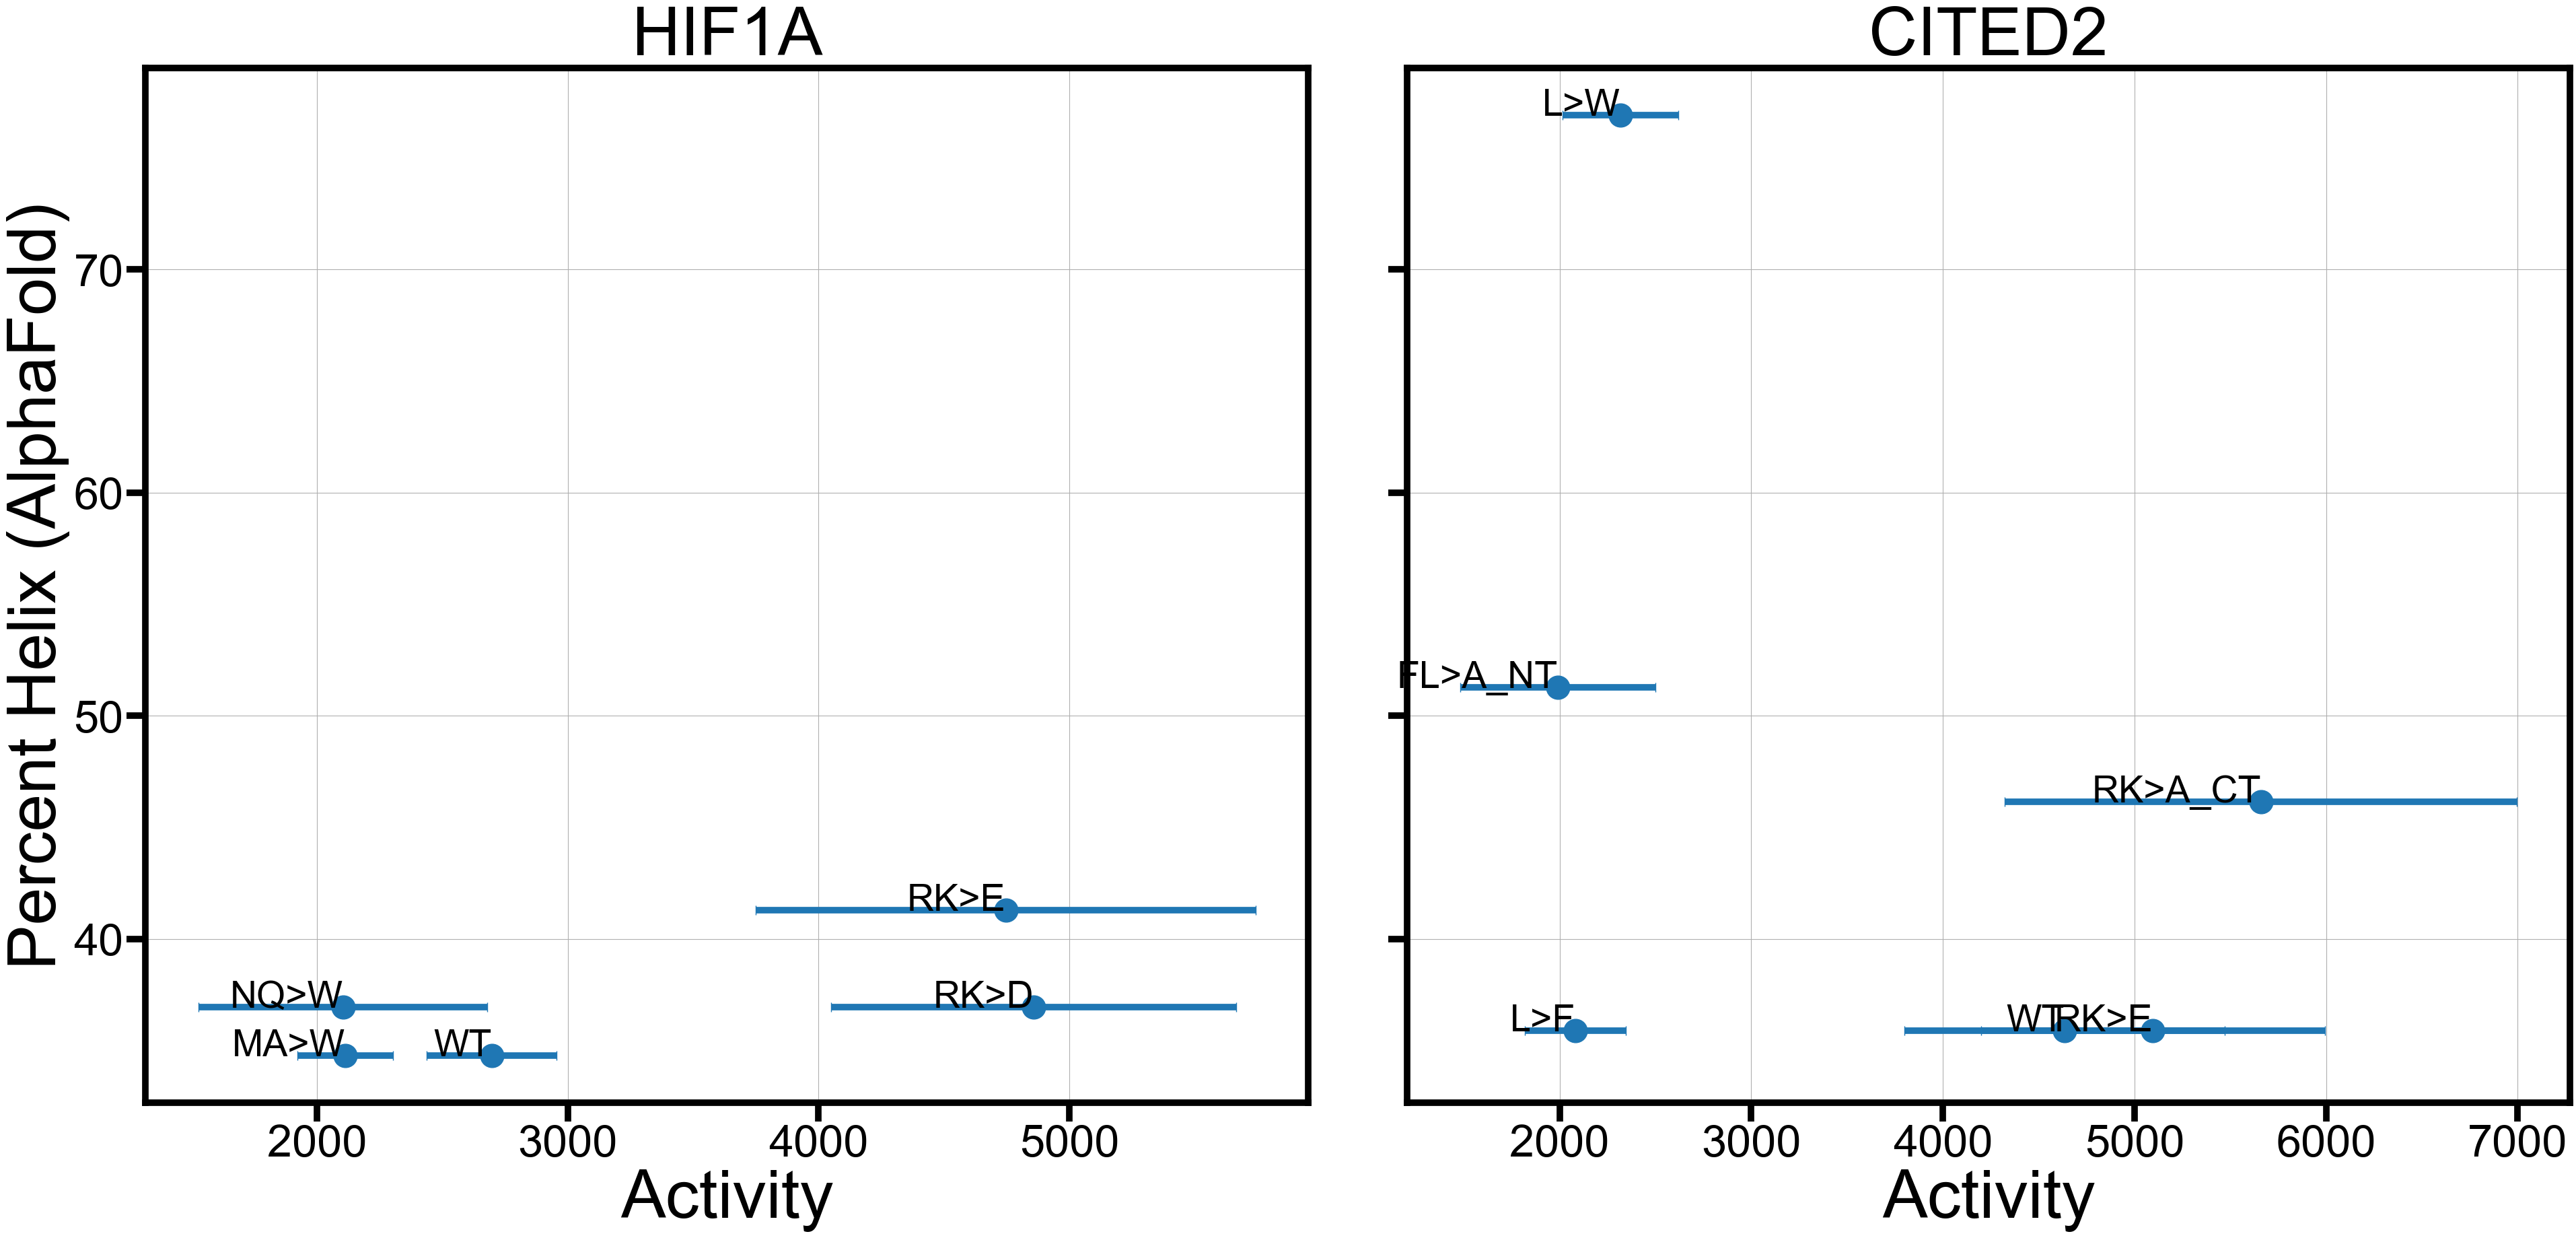

In [64]:
import matplotlib.pyplot as plt

# Filter the merged DataFrame for HIF1A and CITED2
hif1a_df = merged_df[merged_df['Protein'] == 'HIF1A']
cited2_df = merged_df[merged_df['Protein'] == 'CITED2']

# Set up the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(40, 20), sharey=True)

# Scatter plot for HIF1A
axes[0].errorbar(
    hif1a_df['Activity_Mean_MSS18'], 
    hif1a_df['Percent Helix'], 
    xerr=hif1a_df['Activity_std_MSS18'], 
    fmt='o', 
    label='HIF1A',
    markersize=25,
    capsize=5
)
for i, row in hif1a_df.iterrows():
    axes[0].text(
        row['Activity_Mean_MSS18'], 
        row['Percent Helix'], 
        row['mut name'],  # Updated to use 'mut name'
        fontsize=40, 
        ha='right'
    )
axes[0].set_title('HIF1A')
axes[0].set_xlabel('Activity')
axes[0].set_ylabel('Percent Helix (AlphaFold)')
axes[0].grid(True)

# Scatter plot for CITED2
axes[1].errorbar(
    cited2_df['Activity_Mean_MSS18'], 
    cited2_df['Percent Helix'], 
    xerr=cited2_df['Activity_std_MSS18'], 
    fmt='o', 
    label='CITED2',
    markersize=25,
    capsize=5
)
for i, row in cited2_df.iterrows():
    axes[1].text(
        row['Activity_Mean_MSS18'], 
        row['Percent Helix'], 
        row['mut name'],  # Updated to use 'mut name'
        fontsize=40, 
        ha='right'
    )
axes[1].set_title('CITED2')
axes[1].set_xlabel('Activity')
axes[1].grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


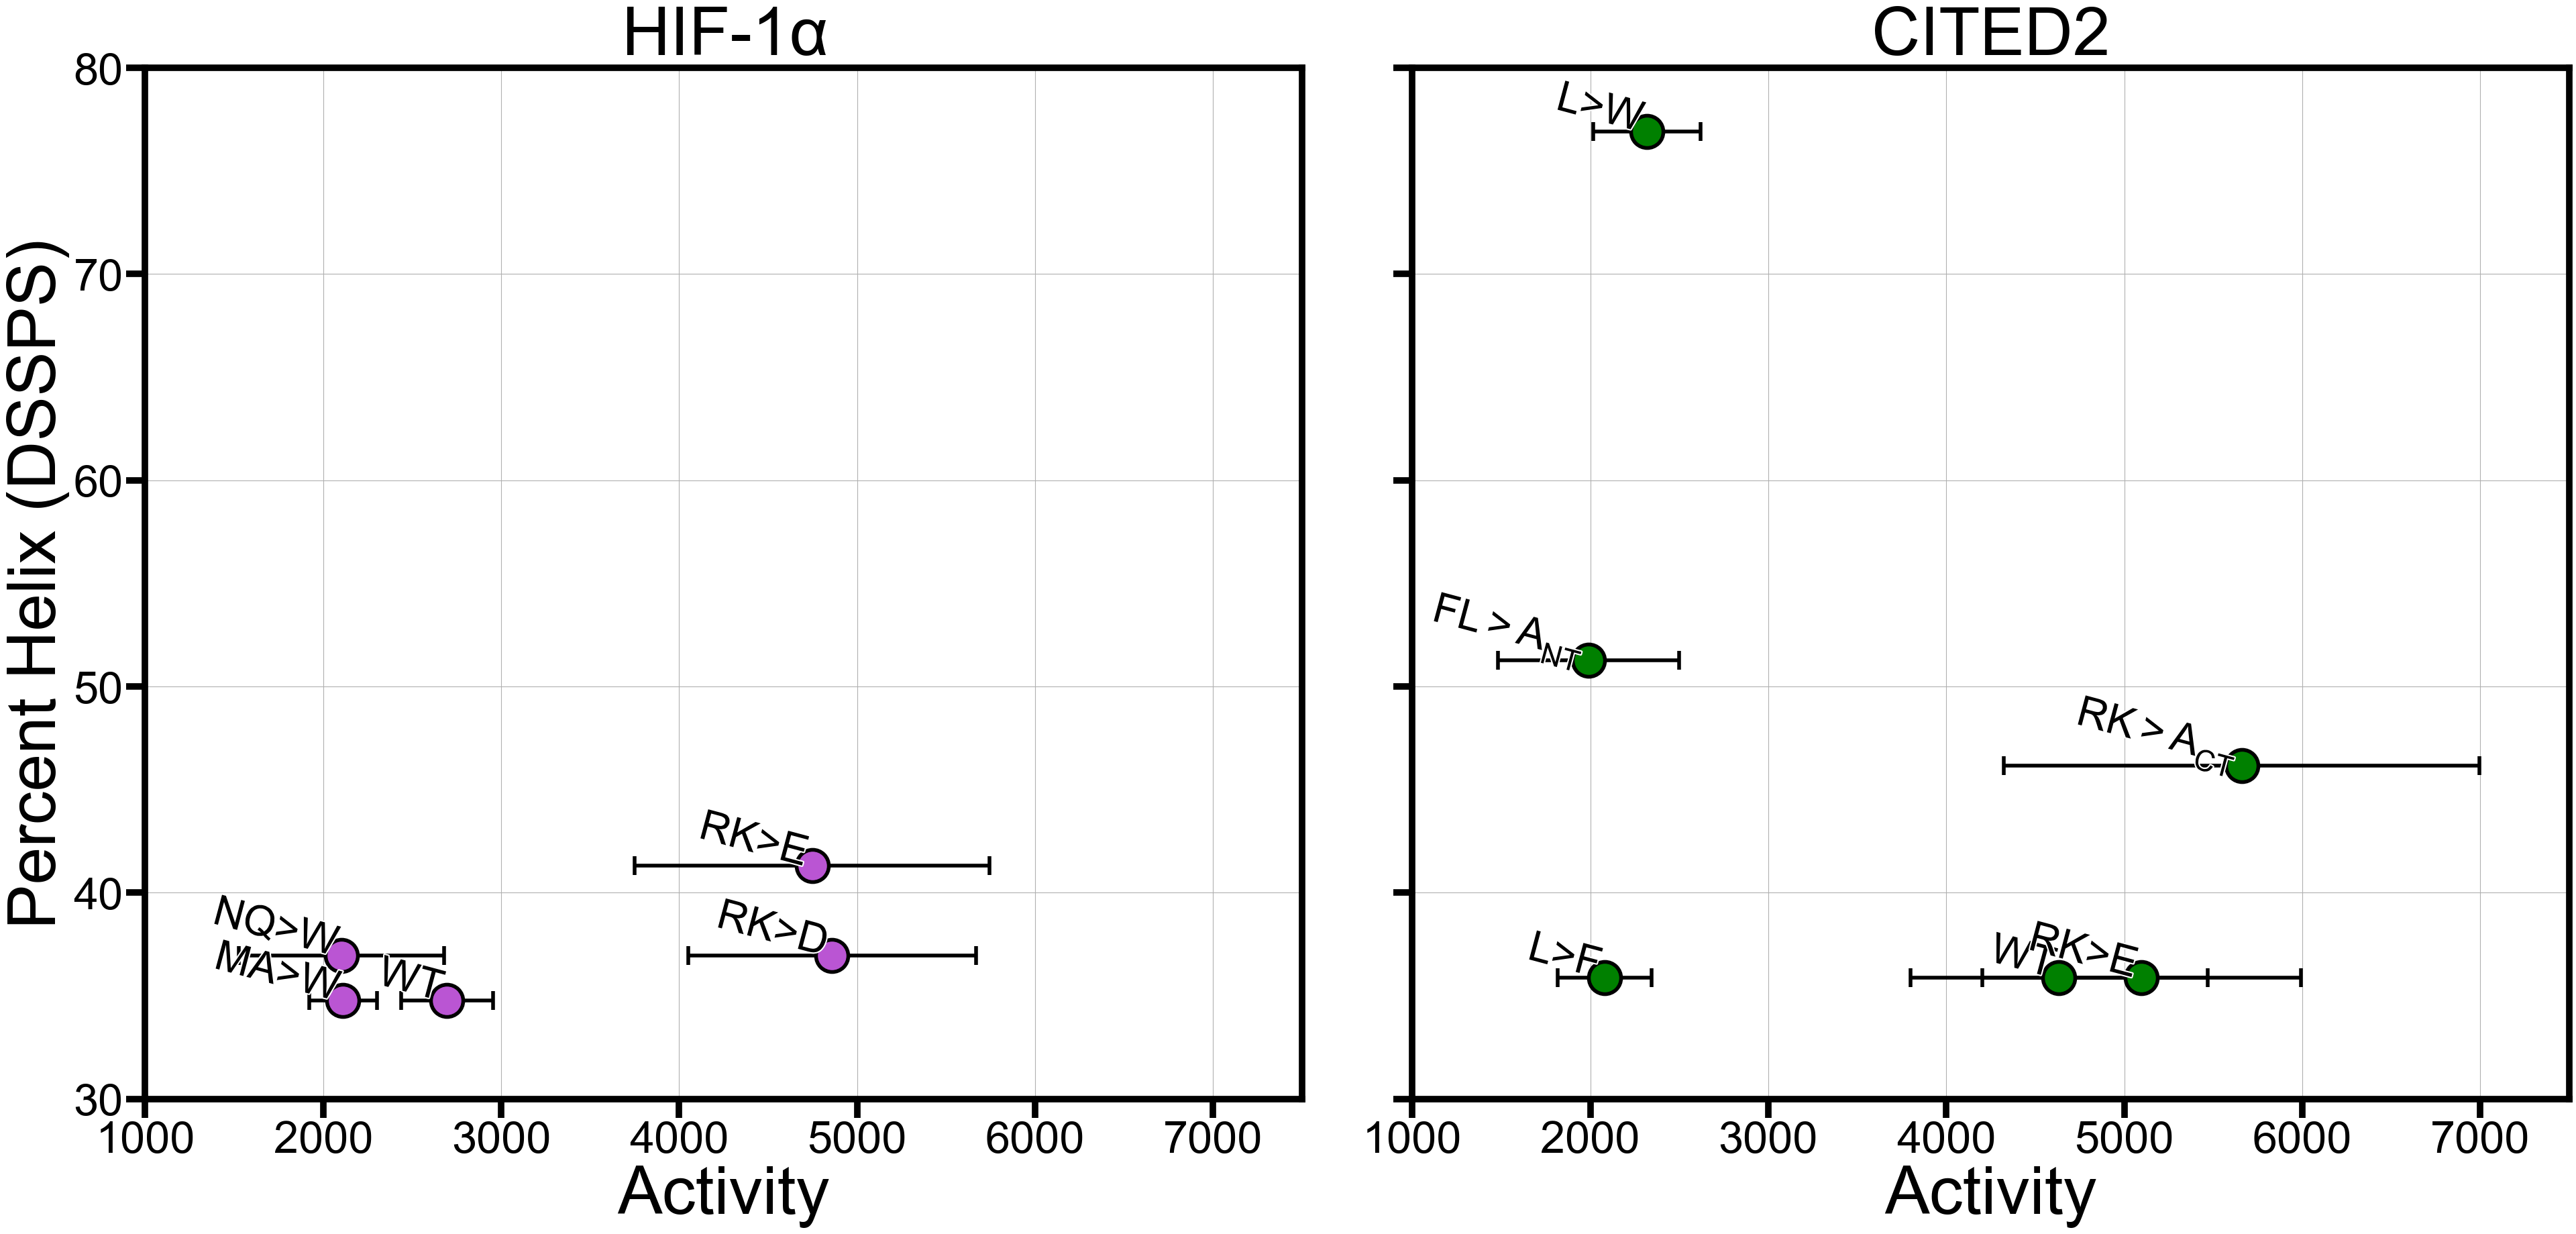

In [73]:
import matplotlib.patheffects as path_effects
# Example color mapping
color_mapping = {
    'HIF1A': 'mediumorchid',
    'CITED2': 'green',
}
# Filter the DataFrame for HIF1A and CITED2
hif1a_df = df[df['Protein'] == 'HIF1A']
cited2_df = df[df['Protein'] == 'CITED2']

# Set up the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(40, 20), sharey=True)

# Scatter plot for HIF1A
# Scatter plot for CITED2
axes[0].errorbar(
    hif1a_df['Activity_Mean_MSS18'], 
    hif1a_df['Percent Helix'], 
    xerr=hif1a_df['Activity_std_MSS18'], 
    fmt='o', 
    ecolor='black',
    elinewidth=4, 
    label='HIF1A', 
    capsize=10,
    markersize=25,
    capthick=4,
)
axes[0].scatter(
    hif1a_df['Activity_Mean_MSS18'], 
    hif1a_df['Percent Helix'], 
    s=1200, 
    color=color_mapping.get('HIF1A'), 
    edgecolor='black', 
    linewidth=4, 
    alpha=1, 
    zorder=3,
)
for i, row in hif1a_df.iterrows():
    text = axes[0].text(
        row['Activity_Mean_MSS18'], 
        row['Percent Helix'], 
        row['MutName'], 
        fontsize=45, 
        ha='right',
        rotation=-15,
    )
    # Add halo effect
    text.set_path_effects([
        path_effects.Stroke(linewidth=3, foreground='white'),  # White halo
        path_effects.Normal()
    ])

axes[0].set_title(r'HIF-1$\alpha$')
axes[0].set_xlabel('Activity')
axes[0].set_ylabel('Percent Helix (DSSPS)')
axes[0].grid(True)
axes[0].set_xlim(1000,7500)
# Scatter plot for CITED2
axes[1].errorbar(
    cited2_df['Activity_Mean_MSS18'], 
    cited2_df['Percent Helix'], 
    xerr=cited2_df['Activity_std_MSS18'], 
    fmt='o', 
    ecolor='black',
    elinewidth=4, 
    label='CITED2', 
    capsize=10,
    markersize=25,
    capthick=4,
)
axes[1].scatter(
    cited2_df['Activity_Mean_MSS18'], 
    cited2_df['Percent Helix'], 
    s=1200, 
    color=color_mapping.get('CITED2'), 
    edgecolor='black', 
    linewidth=4, 
    alpha=1, 
    zorder=3,
)

for i, row in cited2_df.iterrows():
    text = axes[1].text(
        row['Activity_Mean_MSS18'], 
        row['Percent Helix'], 
        row['MutName'], 
        fontsize=45, 
        ha='right',
        rotation=-15,
    )
    # Add halo effect
    text.set_path_effects([
        path_effects.Stroke(linewidth=3, foreground='white'),  # White halo
        path_effects.Normal()
    ])
axes[1].set_title('CITED2')
axes[1].set_xlabel('Activity')
axes[1].set_xlim(1000,7500)
axes[1].set_ylim(30,80)
axes[1].grid(True)
# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [74]:
pwd

'/Users/eflores500/Downloads/ALPHAFOLD_PYMOL'